In [90]:
## reading, Drawing and writing molecules

In [91]:
from rdkit import Chem
from rdkit.Chem import Draw,AllChem
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd
rdkit.__version__

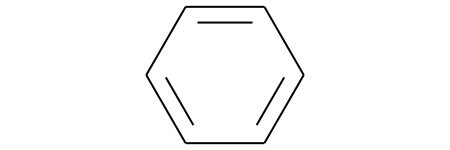

In [92]:
# read from string
amol = Chem.MolFromSmiles('c1ccccc1')
img = Draw.MolToImageFile(amol,"temp.png")
amol

In [93]:
# read a set of mol from a file .csv
# test file from chembl drug data https://www.ebi.ac.uk/chembl/g/#browse/drugs
infilename = "chembl_drug.csv"
infile = pd.read_csv(infilename,sep=";").head(100)
# print(infile.columns)
smiles = infile.Smiles.head(2)
smiles

0    CC(C)C(C(=O)OC(C#N)c1cccc(Oc2ccccc2)c1)c1ccc(C...
1               CCOC(=O)NC(=S)Nc1ccccc1NC(=S)NC(=O)OCC
Name: Smiles, dtype: object

In [94]:
# read from sdf file
suppl = Chem.SDMolSupplier("chembl_drug.sdf")
for mol in suppl:
    print(mol.GetProp("_Name"))
    print(mol.GetProp("smiles"))
    break

FENVALERATE
CC(C)C(C(=O)OC(C#N)c1cccc(Oc2ccccc2)c1)c1ccc(Cl)cc1


In [95]:
# write smiles to sdf file
with Chem.SDWriter("chembl_drug.sdf") as f:
    for index,row in infile.iterrows():
        name = row["Name"]
        smiles = row["Smiles"]
        mol = Chem.MolFromSmiles(smiles)
        # 3d
        # hmol = Chem.AddHs(mol)
        # AllChem.EmbedMolecule(hmol)
        # AllChem.MMFFOptimizeMolecule(hmol)
        mol.SetProp("_Name","%s"%name)
        mol.SetProp("smiles","%s"%smiles)
        f.write(mol)
    